In [62]:
%pdb off
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas


Automatic pdb calling has been turned OFF


In [10]:
def DaskProfReader(filename,taskName):
    filename = open(filename,'r')
    timestamps=list()
    for line in filename:
        line_items = line.split()
        if ("TaskData(key='"+taskName) in line_items[0]:
            for item in line_items:
                if item.startswith('start_time'):
                    timestamp1=float(item.split('=')[1].split(',')[0])
                elif item.startswith('end_time'):
                    timestamp2=float(item.split('=')[1].split(',')[0])
            timestamps.append([timestamp1,timestamp2])
    
    filename.close()
    
    return np.array(timestamps)
    

In [26]:
def SchedulerDelay(profiles):
    delays = np.array([])
    for profile in profiles:
        start_times = profile[:,0]
        start_times.sort()
        start_times = start_times-start_times[0]
        delays = np.append(delays,start_times)
        
    return delays
        

In [39]:
def SchedulerDelayDist(profiles):
    delays = np.array([])
    
    for profile in profiles:
        start_times = profile[0]
        start_times.sort()
        start_times=start_times-start_times[0]
        delays = np.append(delays,start_times)
    
    return delays

In [88]:
# Dask Distributed
profiles_dist=list()
profiles_dist_32=list()
profiles_dist_48=list()
profiles_dist_64=list()

profiles_dist_16_1=list()
profiles_dist_32_1=list()
profiles_dist_48_1=list()
profiles_dist_64_1=list()

profiles_dist_64_2=list()

profiles_dist_16_3=list()
profiles_dist_32_3=list()
profiles_dist_48_3=list()
profiles_dist_64_3=list()

for i in range(0,5):
    profiles_dist.append(np.load('DaskMDA/MDA_dist/DCD50_16_%d.npy'%(i+1)))
    profiles_dist_32.append(np.load('DaskMDA/MDA_dist/DCD50_32_%d.npy'%(i+1)))
    profiles_dist_48.append(np.load('DaskMDA/MDA_dist/DCD50_48_%d.npy'%(i+1)))
    profiles_dist_64.append(np.load('DaskMDA/MDA_dist/DCD50_64_%d.npy'%(i+1)))
    
for i in range(0,5):
    profiles_dist_16_1.append(np.load('DaskMDA/MDA_dist/DCD50_16_%d_1.npy'%(i+1)))
    profiles_dist_32_1.append(np.load('DaskMDA/MDA_dist/DCD50_32_%d_1.npy'%(i+1)))
    profiles_dist_48_1.append(np.load('DaskMDA/MDA_dist/DCD50_48_%d_1.npy'%(i+1)))
    profiles_dist_64_1.append(np.load('DaskMDA/MDA_dist/DCD50_64_%d_1.npy'%(i+1)))
        
for i in range(0,5):
    profiles_dist_64_2.append(np.load('DaskMDA/MDA_dist/DCD50_64_%d_2.npy'%(i+1)))
    
    
    
        
for i in range(0,5):
    profiles_dist_16_3.append(np.load('DaskMDA/MDA_dist3/DCD50_16_%d_3.npy'%(i+1)))
    profiles_dist_32_3.append(np.load('DaskMDA/MDA_dist3/DCD50_32_%d_3.npy'%(i+1)))
    profiles_dist_48_3.append(np.load('DaskMDA/MDA_dist3/DCD50_48_%d_3.npy'%(i+1)))
    profiles_dist_64_3.append(np.load('DaskMDA/MDA_dist3/DCD50_64_%d_3.npy'%(i+1)))

In [19]:
# Dask Multiprocessing
profiles_multi=list()

for i in range(1,6):
    profiles_multi.append(DaskProfReader('DaskMDA/idev4/multiproc_prof_50_16_%d.prof'%i,'block_rmsd'))

In [36]:
len(profiles_dist)

5

In [44]:
distDelay_16 = SchedulerDelayDist(profiles_dist)
distDelay_32 = SchedulerDelayDist(profiles_dist_32)
distDelay_48 = SchedulerDelayDist(profiles_dist_48)
distDelay_64 = SchedulerDelayDist(profiles_dist_64)

In [27]:
multiprocDelay = SchedulerDelay(profiles_multi)
multiprocDelay.shape

(80,)

In [50]:
multiprocDelay=multiprocDelay.reshape(5,16)
distDelay_16 = distDelay_16.reshape(5,16)
distDelay_32 = distDelay_32.reshape(5,32)
distDelay_48 = distDelay_48.reshape(5,48)
distDelay_64 = distDelay_64.reshape(5,64)

In [85]:
distDelay_16_1 = SchedulerDelayDist(profiles_dist_16_1)
distDelay_32_1 = SchedulerDelayDist(profiles_dist_32_1)
distDelay_48_1 = SchedulerDelayDist(profiles_dist_48_1)
distDelay_64_1 = SchedulerDelayDist(profiles_dist_64_1)
distDelay_64_2 = SchedulerDelayDist(profiles_dist_64_2)

distDelay_16_1 = distDelay_16_1.reshape(5,16)
distDelay_32_1 = distDelay_32_1.reshape(5,32)
distDelay_48_1 = distDelay_48_1.reshape(5,48)
distDelay_64_1 = distDelay_64_1.reshape(5,64)
distDelay_64_2 = distDelay_64_2.reshape(5,64)

In [89]:
distDelay_16_3 = SchedulerDelayDist(profiles_dist_16_3)
distDelay_32_3 = SchedulerDelayDist(profiles_dist_32_3)
distDelay_48_3 = SchedulerDelayDist(profiles_dist_48_3)
distDelay_64_3 = SchedulerDelayDist(profiles_dist_64_3)

distDelay_16_3 = distDelay_16_3.reshape(5,16)
distDelay_32_3 = distDelay_32_3.reshape(5,32)
distDelay_48_3 = distDelay_48_3.reshape(5,48)
distDelay_64_3 = distDelay_64_3.reshape(5,64)

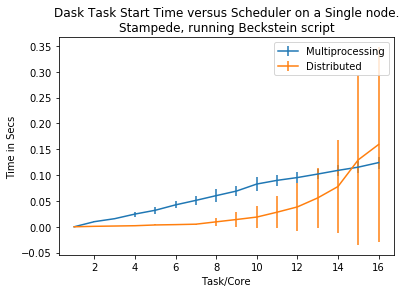

In [58]:
plt.errorbar(range(1,17),multiprocDelay.mean(0),yerr=multiprocDelay.std(0),label='Multiprocessing')
plt.errorbar(range(1,17),distDelay_16.mean(0),yerr=distDelay_16.std(0),label='Distributed')
plt.legend()
plt.title('Dask Task Start Time versus Scheduler on a Single node.\nStampede, running Beckstein script')
plt.ylabel('Time in Secs')
plt.xlabel('Task/Core')
plt.savefig('daskSchedulerDelaysSingleNodeMDAnalysis.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskSchedulerDelaysSingleNodeMDAnalysis.png',dpi=800,bbox_inches='tight')

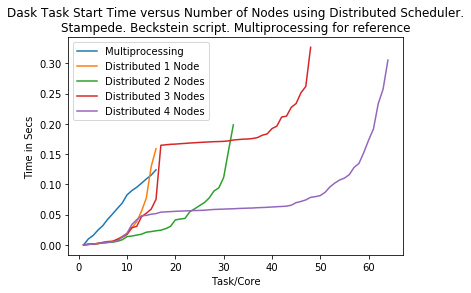

In [60]:
plt.plot(range(1,17),multiprocDelay.mean(0),label='Multiprocessing')
plt.plot(range(1,17),distDelay_16.mean(0),label='Distributed 1 Node')
plt.plot(range(1,33),distDelay_32.mean(0),label='Distributed 2 Nodes')
plt.plot(range(1,49),distDelay_48.mean(0),label='Distributed 3 Nodes')
plt.plot(range(1,65),distDelay_64.mean(0),label='Distributed 4 Nodes')
plt.legend()
plt.title('Dask Task Start Time versus Number of Nodes using Distributed Scheduler.\nStampede. Beckstein script. Multiprocessing for reference')
plt.ylabel('Time in Secs')
plt.xlabel('Task/Core')
plt.savefig('daskSchedulerDelaysvsNodesMDAnalysis.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskSchedulerDelaysvsNodesMDAnalysis.png',dpi=800,bbox_inches='tight')

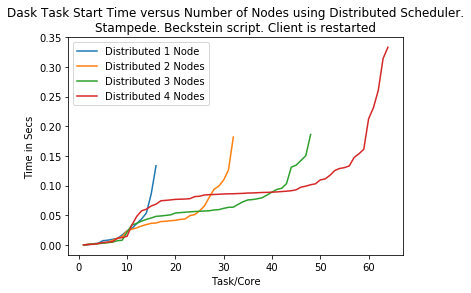

In [87]:
plt.plot(range(1,17),distDelay_16_1.mean(0),label='Distributed 1 Node')
plt.plot(range(1,33),distDelay_32_1.mean(0),label='Distributed 2 Nodes')
plt.plot(range(1,49),distDelay_48_1.mean(0),label='Distributed 3 Nodes')
plt.plot(range(1,65),distDelay_64_2.mean(0),label='Distributed 4 Nodes')
plt.legend()
plt.title('Dask Task Start Time versus Number of Nodes using Distributed Scheduler.\nStampede. Beckstein script. Client is restarted')
plt.ylabel('Time in Secs')
plt.xlabel('Task/Core')
plt.savefig('daskSchedulerDelaysvsNodesMDAnalysisCR.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskSchedulerDelaysvsNodesMDAnalysisCR.png',dpi=800,bbox_inches='tight')

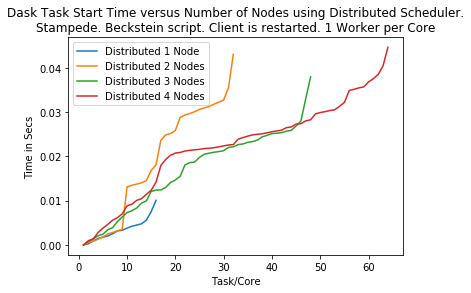

In [97]:
plt.plot(range(1,17),distDelay_16_3.mean(0),label='Distributed 1 Node')
plt.plot(range(1,33),distDelay_32_3.mean(0),label='Distributed 2 Nodes')
plt.plot(range(1,49),distDelay_48_3[1:].mean(0),label='Distributed 3 Nodes')
plt.plot(range(1,65),distDelay_64_3.mean(0),label='Distributed 4 Nodes')
plt.legend()
plt.title('Dask Task Start Time versus Number of Nodes using Distributed Scheduler.\nStampede. Beckstein script. Client is restarted. 1 Worker per Core')
plt.ylabel('Time in Secs')
plt.xlabel('Task/Core')
plt.savefig('daskSchedulerDelaysvsNodesMDAnalysisCRmW.pdf',dpi=800,bbox_inches='tight')
plt.savefig('daskSchedulerDelaysvsNodesMDAnalysisCRmW.png',dpi=800,bbox_inches='tight')

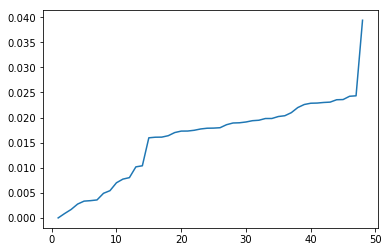

In [96]:
plt.plot(range(1,49),distDelay_48_3[4],label='Distributed 3 Nodes')